# 泰坦尼克生还预测
https://blog.csdn.net/han_xiaoyang/article/details/49797143

## 读入数据，查看数据基本情况

In [111]:
import numpy as np
import pandas as pd
import torch
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


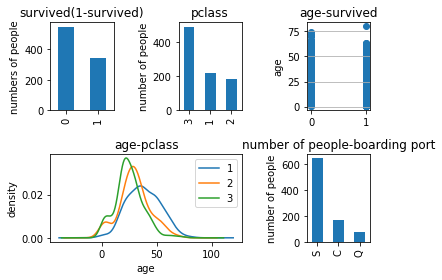

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set(alpha = 0.2)

plt.subplot2grid((2,3),(0,0))
train_data.Survived.value_counts().plot(kind = 'bar')
plt.title("survived(1-survived)")
plt.ylabel("numbers of people")

plt.subplot2grid((2,3),(0,1))
train_data.Pclass.value_counts().plot(kind = 'bar')
plt.title("pclass")
plt.ylabel("number of people")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_data.Survived, train_data.Age)
plt.title("age-survived")
plt.ylabel("age")
plt.grid(b=True, which = 'major', axis='y')

# train_data.Age.value_counts().plot(kind = 'bar')
# plt.title("survived(1-survived)")
# plt.ylabel("numbers of people")

plt.subplot2grid((2,3),(1,0), colspan=2)
train_data.Age[train_data.Pclass == 1].plot(kind='kde')   
train_data.Age[train_data.Pclass == 2].plot(kind='kde')
train_data.Age[train_data.Pclass == 3].plot(kind='kde')
plt.xlabel("age")# plots an axis lable
plt.ylabel("density") 
plt.title("age-pclass")
plt.legend(('1', '2','3'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("number of people-boarding port")
plt.ylabel("number of people")  

plt.tight_layout()
plt.show()

票等级与幸存与否的关系

<Figure size 432x288 with 0 Axes>

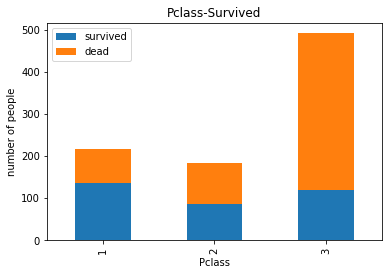

In [20]:
fig = plt.figure()
fig.set(alpha=0.4)

Survived_0 = train_data.Pclass[train_data.Survived==0].value_counts()
Survived_1 = train_data.Pclass[train_data.Survived==1].value_counts()
df = pd.DataFrame({'survived':Survived_1, 'dead':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Pclass-Survived')
plt.xlabel('Pclass')
plt.ylabel('number of people')
plt.show()

生还与性别的关系，生还中男性比例更高，死亡的人女性远高于男性
生还、性别、船票等级关系

<Figure size 432x288 with 0 Axes>

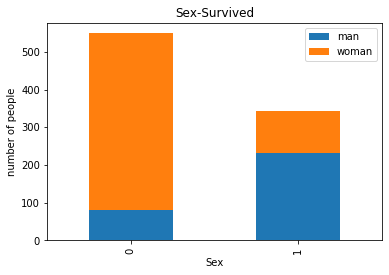

In [21]:
fig = plt.figure()
fig.set(alpha=0.4)

Survived_m = train_data.Survived[train_data.Sex=='male'].value_counts()
Survived_f = train_data.Survived[train_data.Sex=='female'].value_counts()
df = pd.DataFrame({'man':Survived_f, 'woman':Survived_m})
df.plot(kind='bar', stacked=True)
plt.title('Sex-Survived')
plt.xlabel('Sex')
plt.ylabel('number of people')
plt.show()

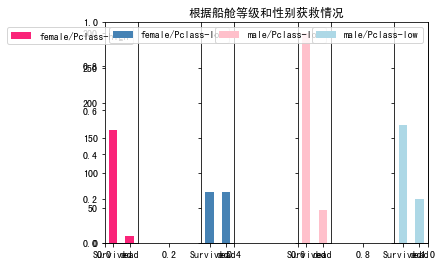

In [31]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 中文标题

fig = plt.figure()
fig.set(alpha = 0.6)
plt.title("根据船舱等级和性别获救情况")

ax1 = fig.add_subplot(141)
train_data.Survived[train_data.Sex=='female'][train_data.Pclass!=3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels(["Survived", "dead"],rotation=0)
ax1.legend(["female/Pclass-high"],loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
train_data.Survived[train_data.Sex=='female'][train_data.Pclass==3].value_counts().plot(kind='bar', label="female lowclass", color='steelblue')
ax2.set_xticklabels(["Survived", "dead"],rotation=0)
plt.legend(["female/Pclass-low"],loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
train_data.Survived[train_data.Sex=='male'][train_data.Pclass==3].value_counts().plot(kind='bar', label="male lowclass", color='pink')
ax3.set_xticklabels(["Survived", "dead"],rotation=0)
plt.legend(["male/Pclass-low"],loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
train_data.Survived[train_data.Sex=='male'][train_data.Pclass!=3].value_counts().plot(kind='bar', label="male highclass", color='lightblue')
ax4.set_xticklabels(["Survived", "dead"],rotation=0)
plt.legend(["male/Pclass-low"],loc='best')

plt.tight_layout()
plt.show()

各个港口获救情况 

<Figure size 432x288 with 0 Axes>

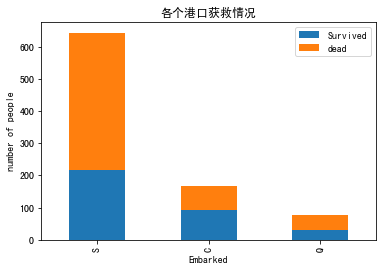

In [34]:
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] = False 

fig = plt.figure()
fig.set(alpha = 0.4)

Survived_0 = train_data.Embarked[train_data.Survived==0].value_counts()
Survived_1 = train_data.Embarked[train_data.Survived==1].value_counts()

df = pd.DataFrame({'Survived':Survived_1, 'dead': Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title("各个港口获救情况")
plt.xlabel("Embarked")
plt.ylabel("number of people")

plt.show()

In [37]:
g = train_data.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


<Figure size 432x288 with 0 Axes>

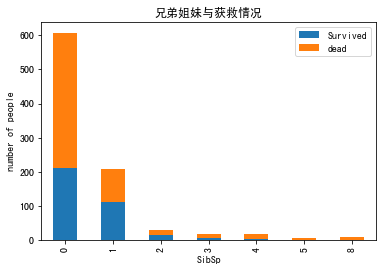

In [39]:
fig = plt.figure()
fig.set(alpha = 0.4)

Survived_0 = train_data.SibSp[train_data.Survived==0].value_counts()
Survived_1 = train_data.SibSp[train_data.Survived==1].value_counts()

df = pd.DataFrame({'Survived':Survived_1, 'dead': Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title("兄弟姐妹与获救情况")
plt.xlabel("SibSp")
plt.ylabel("number of people")

plt.show()

In [38]:
g = train_data.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


<Figure size 432x288 with 0 Axes>

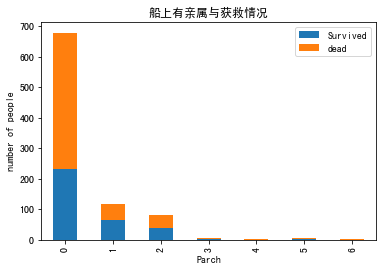

In [40]:
fig = plt.figure()
fig.set(alpha = 0.4)

Survived_0 = train_data.Parch[train_data.Survived==0].value_counts()
Survived_1 = train_data.Parch[train_data.Survived==1].value_counts()

df = pd.DataFrame({'Survived':Survived_1, 'dead': Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title("船上有亲属与获救情况")
plt.xlabel("Parch")
plt.ylabel("number of people")

plt.show()

<Figure size 432x288 with 0 Axes>

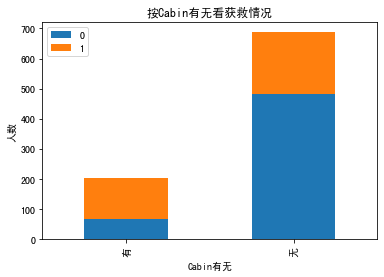

In [41]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train_data.Survived[pd.notnull(train_data.Cabin)].value_counts()
Survived_nocabin = train_data.Survived[pd.isnull(train_data.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

年龄与幸存与否的关系，存在一定关系，幸存者中青年占比更多

In [59]:
for i in range(891):
    if train_data.Age[i]<=20:
        train_data.Age[i]=0
    elif train_data.Age[i]<50 and train_data.Age[i]>20:
        train_data.Age[i]=1
    else:
        train_data.Age[i]=2
train_data.Age

F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    0.0
888    2.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

<Figure size 432x288 with 0 Axes>

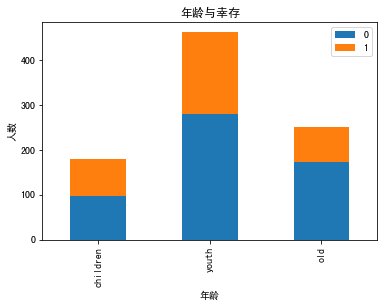

In [60]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_children = train_data.Survived[train_data.Age==0.].value_counts()
Survived_youth = train_data.Survived[train_data.Age==1.].value_counts()
Survived_old = train_data.Survived[train_data.Age==2.].value_counts()
df=pd.DataFrame({'children':Survived_children,'youth':Survived_youth, 'old':Survived_old}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"年龄与幸存")
plt.xlabel(u"年龄") 
plt.ylabel(u"人数")
plt.show()

### 选择特征：Sex, Pclass, Age, Embarked; 备选特征：SibSp, Cabin

## 数据预处理，特征工程
处理缺省值，异常值，特征离散化，特征选取

In [112]:
from sklearn.ensemble import RandomForestRegressor as RFR

def set_missing_ages(df):
    
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    y = known_age[:, 0]
    X = known_age[:, 1:]
    
    rfr = RFR(random_state=0, n_estimators=2000, n_jobs = -1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "No"
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "Yes"
    return df

In [113]:
train_data, rfr = set_missing_ages(train_data)
train_data = set_Cabin_type(train_data)

F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
F:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [114]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,Yes,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,Yes,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,Yes,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,Yes,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,Yes,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16.19395,1,2,W./C. 6607,23.4500,Yes,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,Yes,C


利用pandas中get_dummies进行特征展平，即多分类问题变成向量

In [115]:
dummies_Cabin = pd.get_dummies(train_data['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(train_data['Embarked'], prefix = 'Embarked')

dummies_Sex = pd.get_dummies(train_data['Sex'], prefix = 'Sex')

dummies_Pclass = pd.get_dummies(train_data['Pclass'], prefix = 'Pclass')

df = pd.concat([train_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass],axis = 1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.00000,1,0,7.2500,1,0,0,1,0,1,0,0,1
1,2,1,38.00000,1,0,71.2833,1,1,0,0,1,0,1,0,0
2,3,1,26.00000,0,0,7.9250,1,0,0,1,1,0,0,0,1
3,4,1,35.00000,1,0,53.1000,1,0,0,1,1,0,1,0,0
4,5,0,35.00000,0,0,8.0500,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,1,0,1,0,1,0
887,888,1,19.00000,0,0,30.0000,1,0,0,1,1,0,1,0,0
888,889,0,16.19395,1,2,23.4500,1,0,0,1,1,0,0,0,1
889,890,1,26.00000,0,0,30.0000,1,1,0,0,0,1,1,0,0


Fare, Age跨度太大，作尺度变化，特征化至[-1,1]

In [116]:
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()

age_scale_param = scaler.fit(df['Age'].to_numpy().reshape((891,1)))
df['Age_scaled'] = scaler.fit_transform(df['Age'].to_numpy().reshape((891,1)), age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].to_numpy().reshape((891,1)))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].to_numpy().reshape((891,1)), fare_scale_param)

df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.00000,1,0,7.2500,1,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.00000,1,0,71.2833,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.00000,0,0,7.9250,1,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.00000,1,0,53.1000,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.00000,0,0,8.0500,1,0,0,1,0,1,0,0,1,0.392942,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,1,0,0,1,0,1,0,1,0,-0.194333,-0.386671
887,888,1,19.00000,0,0,30.0000,1,0,0,1,1,0,1,0,0,-0.781608,-0.044381
888,889,0,16.19395,1,2,23.4500,1,0,0,1,1,0,0,0,1,-0.987599,-0.176263
889,890,1,26.00000,0,0,30.0000,1,1,0,0,0,1,1,0,0,-0.267742,-0.044381


### 建立Logistic模型 

In [126]:
from sklearn import linear_model

train_df = df.filter(regex = 'Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

y = train_np[:, 0]
x = train_np[:, 1:]

clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty = 'l1', tol = 1e-6)
clf.fit(x,y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

### test_data 预处理 

In [143]:
test_data = pd.read_csv('test.csv')

In [144]:
test_data.loc[(test_data.Fare.isnull()), 'Fare'] = 0

tmp_df = test_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test_data.Age.isnull()].values

X = null_age[:, 1:]
predictedAge = rfr.predict(X)
test_data.loc[(test_data.Age.isnull()), 'Age'] = predictedAge

test_data = set_Cabin_type(test_data)
dummies_Cabin = pd.get_dummies(test_data['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')

df_test = pd.concat([test_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].to_numpy().reshape(418,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].to_numpy().reshape(418,1), fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,1,1,0,0,0,1,-0.641199,-0.416740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,1,0,1,0,0,1,0.019545,-0.492680
414,1306,39.000000,0,0,108.9000,1,1,0,0,1,0,1,0,0,0.649061,1.314641
415,1307,38.500000,0,0,7.2500,1,0,0,1,0,1,0,0,1,0.611112,-0.507017
416,1308,30.705727,0,0,8.0500,1,0,0,1,0,1,0,0,1,0.019545,-0.492680


### 预测 

In [145]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

### 逻辑回归系统优化  
1、模型系数系统优化
2、交叉验证
3、learning curves

In [148]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3520231703222324]
1,Parch,[-0.0850667500246415]
2,Cabin_Yes,[0.0]
3,Embarked_C,[0.0]
4,Embarked_Q,[0.0]
5,Embarked_S,[-0.3872432804863892]
6,Sex_female,[2.0092309749512722]
7,Sex_male,[-0.6370744365808299]
8,Pclass_1,[0.99851572054721]
9,Pclass_2,[0.0]


coef回归系数为正的特征，和最后结果是正相关，反之为负相关。

In [157]:
from sklearn.model_selection import cross_val_score

clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:, 1:]
y = all_data.values[:, 0]

print(cross_val_score(clf, X, y, cv=5))

[0.7877095  0.81564246 0.7752809  0.79213483 0.84180791]


In [161]:
from sklearn.model_selection import train_test_split

train_split, cv_split = train_test_split(df, test_size=0.3, random_state=0)
train_df = train_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf = linear_model.LogisticRegression(solver='liblinear' ,C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:, 1:], train_df.values[:, 0])

cv_df = cv_split.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:, 1:])

origin_data_train = pd.read_csv('train.csv')
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(cv_split[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.00,1,0,PC 17604,82.1708,NaN,C
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S


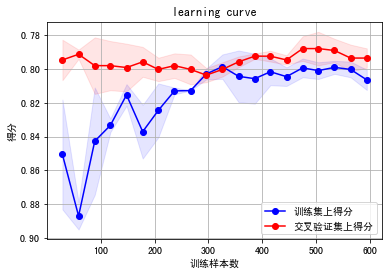

(0.8000782938341318, 0.024621277934465002)

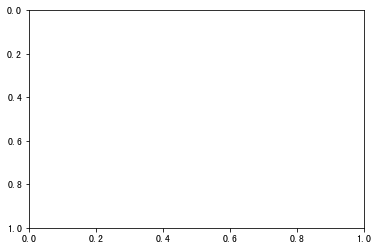

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import warnings

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
plot_learning_curve(clf, "learning curve", X, y)

model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

### 模型融合（ensemble）
bagging、 boosting、 GBDT、 stacking

In [173]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(solver='liblinear', C = 1.0, penalty = 'l1', tol = 1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X,y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)